In [1]:
from siphon.catalog import TDSCatalog

"""
    Siphon is a collection of Python utilities for downloading data from remote data services. 
    Much of Siphon’s current functionality focuses on access to data hosted on a THREDDS Data Server. 
    It also provides clients to a variety of simple web services.
    Link to documentation:https://unidata.github.io/siphon/latest/index.html
"""

# for autocompletion disable the autocompletion tool 'jedi'
%config Completer.use_jedi = False


In [2]:
"""
    Read a catalog from THREDDS Data Server
    First construct a TDSCatalog instance pointing to the dataset of interest, in this case TDS’ “Best” virtual
    dataset for the GFS global 0.25 degree collection of GRIB files. 
    This catalog contains a single dataset.
"""

best_gfs = TDSCatalog(
    "http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/"
    "Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best"
)
best_gfs.datasets

['Best GFS Quarter Degree Forecast Time Series']

In [3]:
# Pull out the dataset and call subset() to set up requesting a subset of the data.
best_ds = list(best_gfs.datasets.values())[0]
ncss = best_ds.subset()

In [4]:
# Use the ncss object to create a new query object, which facilitates asking for data from the server.
query = ncss.query()

In [5]:
# Look at the ncss.variables object to see what variables are available from the dataset:
ncss.variables

{'5-Wave_Geopotential_Height_isobaric',
 'Absolute_vorticity_isobaric',
 'Albedo_surface_Mixed_intervals_Average',
 'Apparent_temperature_height_above_ground',
 'Best_4_layer_Lifted_Index_surface',
 'Categorical_Freezing_Rain_surface',
 'Categorical_Freezing_Rain_surface_Mixed_intervals_Average',
 'Categorical_Ice_Pellets_surface',
 'Categorical_Ice_Pellets_surface_Mixed_intervals_Average',
 'Categorical_Rain_surface',
 'Categorical_Rain_surface_Mixed_intervals_Average',
 'Categorical_Snow_surface',
 'Categorical_Snow_surface_Mixed_intervals_Average',
 'Cloud_Work_Function_entire_atmosphere_single_layer_Mixed_intervals_Average',
 'Cloud_mixing_ratio_hybrid',
 'Cloud_mixing_ratio_isobaric',
 'Cloud_water_entire_atmosphere_single_layer',
 'Composite_reflectivity_entire_atmosphere',
 'Convective_Precipitation_Rate_surface_Mixed_intervals_Average',
 'Convective_available_potential_energy_pressure_difference_layer',
 'Convective_available_potential_energy_surface',
 'Convective_inhibition_p

### Create query
Construct a query asking for data corresponding to a latitude and longitude box where 

- 90 lat is the northern extent 
- -90 lat is the southern extent 
- -180 long is the western extent 
- 180 is the eastern extent   

(Note: longitude values are the longitude distance from the prime meridian.)

Request the data for the current time.   
This request will return all surface temperatures for points in the bounding box for a single time.  
(Note: the string representation of the query is a properly encoded query string)

In [6]:
from datetime import datetime

In [7]:
# Set full extent and time
# Latitude coordinates of GFS run from 0 to 360, and NOT from -180 till 180 
# full extent is therefore -90 till 90 and 0 till 360
# if you want to 
long_West = 0 
long_East = 360
lat_South = -90 
lat_North = 90
query.lonlat_box(south=lat_South,north=lat_North, west=long_West, east=long_East).time(datetime.utcnow())

# Set data format to be accepted, here netcdf4
query.accept('netcdf4')

# Set target variable
query.variables('Wind_speed_gust_surface','Geopotential_height_maximum_wind', 'Temperature_maximum_wind')

long_West

0

In [8]:
from xarray.backends import NetCDF4DataStore
import xarray as xr

In [9]:
data = ncss.get_data(query)
data = xr.open_dataset(NetCDF4DataStore(data))

list(data)
lala = data.to_netcdf('52N_days_Wind1.nc')

data.coords

Coordinates:
    reftime  (time) datetime64[ns] ...
  * time     (time) datetime64[ns] 2021-02-25T15:00:00
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8

In [10]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

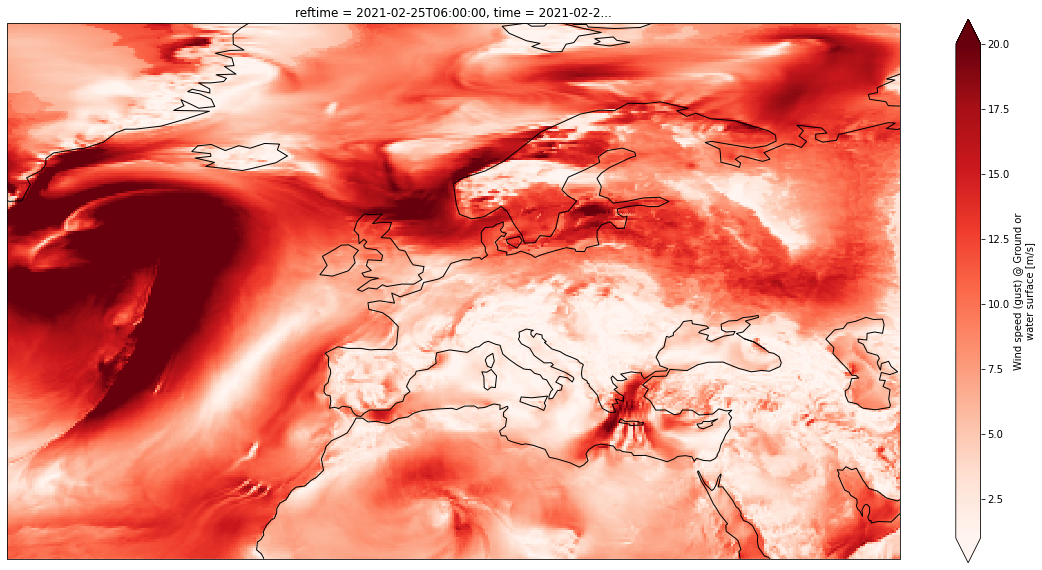

In [15]:
wind = xr.open_dataset("/home/imke/Desktop/MariData/Data/shipWeatherRouting/52N_days_Wind1.nc")

wind_speed = wind.Wind_speed_gust_surface

fig = plt.figure(figsize=(20, 10))
# fig.suptitle("{variable}".format(variable=v.name))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind_speed.isel(time=0).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="Reds")


In [12]:
wind_speed = wind.Wind_speed_gust_surface
wind.coords

Coordinates:
    reftime  (time) datetime64[ns] ...
  * time     (time) datetime64[ns] 2021-02-25T15:00:00
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8

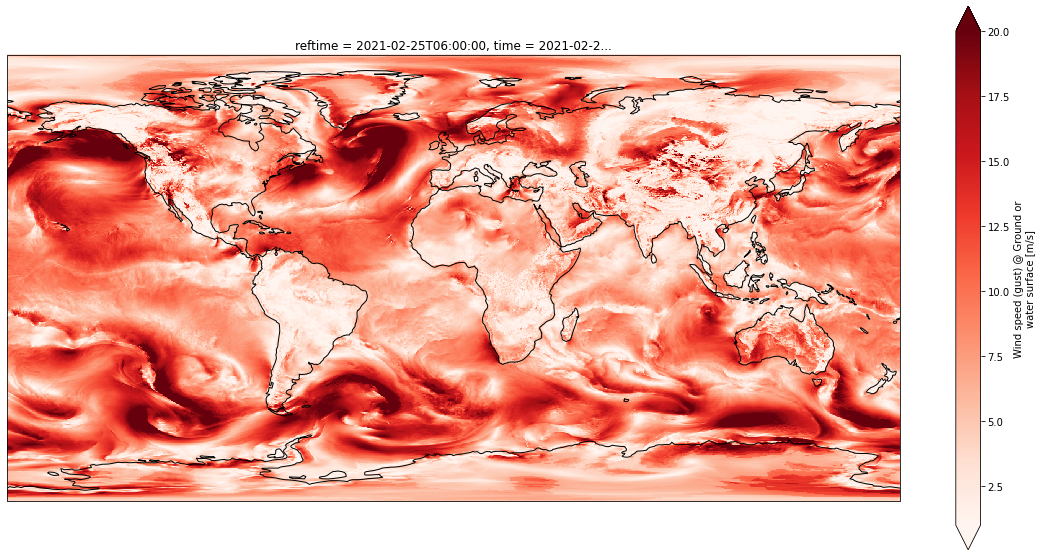

In [16]:
fig = plt.figure(figsize=(20, 10))
# fig.suptitle("{variable}".format(variable=v.name))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
p = wind_speed.isel(time=0).plot(
    transform=ccrs.PlateCarree(), robust=True, cmap="Reds")#"RdBu_r")
